In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.shape

(119390, 32)

## incomplete

In [5]:
#df.isnull().sum()
(df.isnull().sum()*100)/len(df)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [6]:
df.dropna(subset = ["country" , "children"] ,inplace = True)

<AxesSubplot:title={'center':'after filling'}, ylabel='Frequency'>

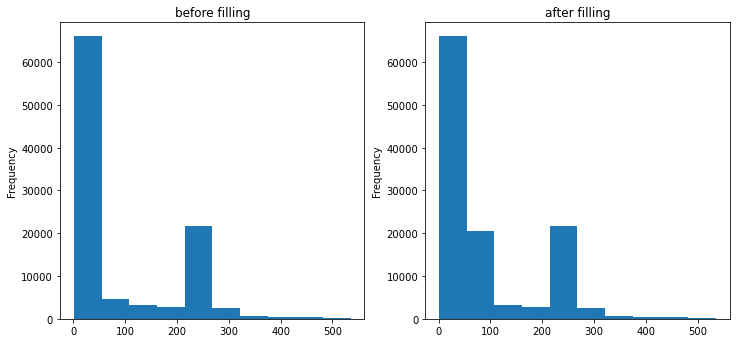

In [7]:
plt.figure(figsize = (12,12))
plt.subplot(2,2,1)
df["agent"].plot(kind = "hist" , title = "before filling")
plt.subplot(2,2,2)
df["agent"].fillna(df["agent"].mean()).plot(kind = "hist",title = "after filling")

In [16]:
#df["agent"][df["agent"].isnull()] = df["agent"].dropna().sample( df["agent"].isnull().sum() )


<ipython-input-16-540cf4d936ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["agent"][df["agent"].isnull()] = df["agent"].dropna().sample( df["agent"].isnull().sum() )


In [8]:
df["agent"].fillna(df["agent"].mean(),inplace = True)


Company has 94% missing value so lets drop the column

In [9]:
df.drop("company"  , axis = 1 , inplace = True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## duplicated

In [25]:
df.duplicated().sum()

31965

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
df.duplicated().sum()

0

seems to have some dirtiness in data as Adults,babies & children cant be zero at a same time

In [11]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
data = df[~filter]

In [12]:
len(df)

118898

In [13]:
len(data)

118728

## incorrect

In [15]:
columns = df.select_dtypes(include = ["object"]).columns

In [16]:
for col in columns:
    print(f"{col} has {df[col].unique()} features")

hotel has ['Resort Hotel' 'City Hotel'] features
arrival_date_month has ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] features
meal has ['BB' 'FB' 'HB' 'SC' 'Undefined'] features
country has ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 

## Inconsistent

In [14]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [17]:
#reservation status date is in the form of obj but it should be in the form of date

In [19]:

data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])
data['year']=data['reservation_status_date'].dt.year
data['month']=data['reservation_status_date'].dt.month
data['day']=data['reservation_status_date'].dt.day

<ipython-input-19-fcb060fda559>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])
<ipython-input-19-fcb060fda559>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']=data['reservation_status_date'].dt.year
<ipython-input-19-fcb060fda559>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [20]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [27]:
#data['reservation_status_date'].dt.day_name()

0         Wednesday
1         Wednesday
2          Thursday
3          Thursday
4            Friday
            ...    
119385    Wednesday
119386     Thursday
119387     Thursday
119388     Thursday
119389     Thursday
Name: reservation_status_date, Length: 118728, dtype: object

In [ ]:
#datetime.datetime.strptime(month_number, "%m")

## outlier (out of range)

In [36]:
int_col = data.select_dtypes(include = ["number"]).columns

In [43]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
count,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,...,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000
mean,0.371757,104.401312,2016.157596,27.165100,15.800965,0.928307,2.500918,1.861052,0.104356,0.007959,...,0.131612,0.218828,86.580566,2.330638,102.133442,0.061915,0.571778,2016.094367,6.334083,15.667391
std,0.483276,106.915284,0.707456,13.586362,8.780412,0.992725,1.889089,0.574697,0.399439,0.097449,...,1.485300,0.638914,103.021600,17.633065,50.389602,0.244230,0.792740,0.715380,3.343741,8.779596
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,70.000000,0.000000,0.000000,2016.000000,3.000000,8.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,28.000000,0.000000,95.000000,0.000000,0.000000,2016.000000,6.000000,16.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,153.000000,0.000000,126.000000,0.000000,1.000000,2017.000000,9.000000,23.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,...,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,2017.000000,12.000000,31.000000


In [44]:
data.to_csv("hotel_bookings_clean.csv")

In [45]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year,month,day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015,7,3
